In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os

MAX_DEPTH = 20
PROB_BRANCH = 0.25
VALUES = range(1, 10)
OPS_E = [0, 1]
OPS_T = [2, 3]
NTYPES = ['e', 't']
OP_MAP = ['+', '-', '*', '/']

In [2]:
FLANG = os.path.join('..', 'flang')
TRAIN = os.path.join(FLANG, 'train_d30.tsv')
VALID = os.path.join(FLANG, 'valid_d30.tsv')
TEST = os.path.join(FLANG, 'test_d30.tsv')

In [8]:
def to_value_sd(sd_lst, node_lst):
    if len(sd_lst) == 0:
        node = node_lst[0]
        v = node
    else:
        i = np.argmax(sd_lst)
        child_l, v_l = to_value_sd(sd_lst[:i], node_lst[:i+1])
        child_r, v_r = to_value_sd(sd_lst[i+1:], node_lst[i+1:])
        node = (child_l, child_r)
        if isinstance(v_l, tuple) and not isinstance(v_r, tuple):
            v1, op = v_l[0], v_l[1]
            v2 = v_r
            if op == '/':
                v = str(int(v1) % int(v2))
            else:
                v = str(eval(''.join([v1, op, v2])) % 10)
        else:
            assert not isinstance(v_l, tuple) and not isinstance(v_r, tuple)
            v = (v_l, v_r)

    return node, v

In [4]:
train = []
valid = []
test = []
with open(TRAIN, 'r') as ftrain, open(VALID, 'r') as fvalid, open(TEST, 'r') as ftest:
    for line in ftrain:
        train.append(line.strip().split('\t'))
    for line in fvalid:
        valid.append(line.strip().split('\t'))
    for line in ftest:
        test.append(line.strip().split('\t'))

In [7]:
lens = []
for e in train:
    node_lst, sd_lst, h = e
    lens.append(len(node_lst.split()))
print(np.average(lens))
print(np.var(lens))

12.591625
164.768979859375


In [28]:
train[0]

['3 * 4 * 1 + 2', '1 2 3 4 5 6', '6']

In [29]:
node_lst, sd_lst = train[0][0].split(), train[0][1].split()

In [30]:
to_value_sd(sd_lst, node_lst)

((((((('3', '*'), '4'), '*'), '1'), '+'), '2'), '4')

In [32]:
with open('train_d30.tsv', 'w') as ftrain, \
    open('valid_d30.tsv', 'w') as fvalid, \
    open('test_d30.tsv', 'w') as ftest:
    for es, f in zip([train, valid, test], [ftrain, fvalid, ftest]):
        for e in es:
            node_lst, sd_lst, h = e
            ds = list(map(int, sd_lst.split()))
            val = to_value_sd(ds, node_lst.split())[1]
            f.write('\t'.join([node_lst, sd_lst, h, val])+'\n')

In [31]:
nodes = '3 / 4 * 1 + 2'.split()
ds = '1 2 3 4 5 6'.split()
to_value_sd(ds, nodes)

((((((('3', '/'), '4'), '*'), '1'), '+'), '2'), '5')

In [35]:
val_lst = []
for node_str, ds_str, h in train:
    ds = list(map(int, ds_str.split()))
    val = to_value_sd(ds, node_str.split())[1]
    val_lst.append(int(val))

In [38]:
val_lst[0]

4

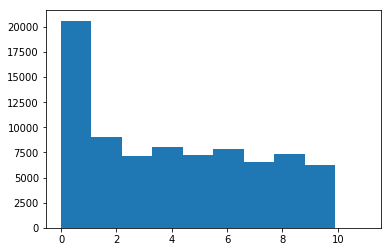

In [39]:
plt.hist(val_lst, bins=10, range=(0, 10+1))
plt.show()

In [46]:
train = []
valid = []
test = []
with open('train_d30.tsv', 'r') as ftrain, \
    open('valid_d30.tsv', 'r') as fvalid, \
    open('test_d30.tsv', 'r') as ftest:
    for es, f in zip([train, valid, test], [ftrain, fvalid, ftest]):
        for line in f:
            es.append(line.strip().split('\t')) 

In [47]:
test[:10]

[['1 + 1 / 2', '1 3 1 2', '3', '2'],
 ['1 - 6 / 7 / 1 * 8 + 6 + 3', '1 7 1 2 3 4 5 6 8 9 10 11', '11', '0'],
 ['9 + 6 / 2 * 5 * 9 + 5 / 4 + 9 / 3 + 3 - 3 - 2 / 6 * 3 * 4 * 3 / 5 / 6 / 9 + 1 / 9 - 9 / 2 / 6 - 2 + 1 / 8 * 1 / 1 * 1 * 8 * 6 + 3 / 7 * 3 / 2 * 1 / 6 - 9 * 9 * 3',
  '1 7 1 2 3 4 5 6 8 9 1 2 10 11 1 2 12 13 14 15 16 17 1 2 3 4 5 6 7 8 9 10 11 12 13 14 18 19 1 2 20 21 1 2 3 4 22 23 24 25 1 2 3 4 5 6 7 8 9 10 11 12 26 27 1 2 3 4 5 6 7 8 9 10 28 29 1 2 3 4',
  '29',
  '4'],
 ['1 + 8 - 8 / 9 / 6 * 1 / 7 / 7 * 8 + 7',
  '1 2 3 13 1 2 3 4 5 6 7 8 9 10 11 12 14 15',
  '15',
  '0'],
 ['3 - 4 / 7', '1 3 1 2', '3', '9'],
 ['5 - 8 / 2 / 7 * 5 / 7 * 6 / 9 * 6 + 7 * 2 / 7 * 7 * 4 + 2 + 6 - 6 + 6 * 1 + 5 * 7',
  '1 15 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 1 2 3 4 5 6 7 8 18 19 20 21 22 23 24 25 1 2 26 27 1 2',
  '27',
  '0'],
 ['6 * 6 + 2 * 8 * 9', '1 2 3 5 1 2 3 4', '5', '0'],
 ['6 + 6 / 6 / 7 / 2 / 8 * 8 / 7 - 4 - 4 / 8',
  '1 13 1 2 3 4 5 6 7 8 9 10 11 12 14 15 16 17 1 2',
  '17',
  '8

# monotony analysis set

In [33]:
ANALY = os.path.join(FLANG, 'test_d30_mono.tsv')
analy = []
with open(ANALY, 'r') as f:
    for line in f:
        analy.append(line.strip().split('\t'))

In [34]:
with open('test_d30_mono.tsv', 'w') as f:
    for e in analy:
        node_lst, sd_lst, h = e
        ds = list(map(int, sd_lst.split()))
        val = to_value_sd(ds, node_lst.split())[1]
        f.write('\t'.join([node_lst, sd_lst, h, val])+'\n')

# equal fraction test set

In [6]:
TEST_EF = os.path.join(FLANG, 'test_d30_ef.tsv')
test_ef = []
with open(TEST_EF, 'r') as f:
    for line in f:
        test_ef.append(line.strip().split('\t'))

In [9]:
with open('test_d30_ef.tsv', 'w') as f:
    for e in test_ef:
        node_lst, sd_lst, h = e
        ds = list(map(int, sd_lst.split()))
        val = to_value_sd(ds, node_lst.split())[1]
        f.write('\t'.join([node_lst, sd_lst, h, val])+'\n')

# distribution of \#extremes

In [44]:
def num_extrem_vals(ds):
    res = 0
    for i, d in enumerate(ds):
        if i == 0:
            if d > ds[1]:
                res += 1
        elif i == len(ds)-1:
            if d > ds[-2]:
                res += 1
        elif d > ds[i-1] and d > ds[i+1]:
            res += 1
    
    return res            

In [56]:
ne = []
with open('test_d30_ef.tsv', 'r') as f:
    for line in f:
        node_lst, sd_lst, h, lbl = line.strip().split('\t')
        ds = list(map(int, sd_lst.split()))
        ne.append(num_extrem_vals(ds))

(array([2.9770e+04, 3.0499e+04, 9.6480e+03, 4.4530e+03, 2.4840e+03,
        1.4770e+03, 8.3300e+02, 4.7200e+02, 2.2800e+02, 1.0200e+02,
        2.4000e+01, 1.0000e+01]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

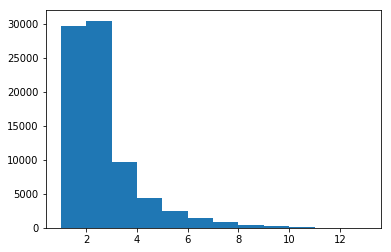

In [61]:
plt.hist(ne, bins=np.arange(1, 14, 1))

In [58]:
ne = []
with open('train_d30.tsv', 'r') as f:
    for line in f:
        node_lst, sd_lst, h, lbl = line.strip().split('\t')
        ds = list(map(int, sd_lst.split()))
        ne.append(num_extrem_vals(ds))

In [69]:
max(ne)

12

In [70]:
min(ne)

1

(array([29770., 30499.,  9648.,  4453.,  2484.,  1477.,   833.,   472.,
          228.,   102.,    34.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

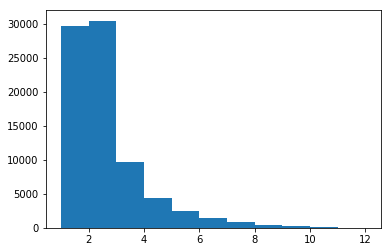

In [71]:
plt.hist(ne, bins=np.arange(min(ne), max(ne)+1, 1))

# ne